In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplolib inline # jupyter notebook에서 사용하고 있는 웹브라우저에 직접 시각화 출력물을 표현하기 위한 코드

In [2]:
df= pd.read_csv('Ashopping.csv',  sep=',', encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


#### 데이터 전처리 및 파생변수 생성
* 대부분의 경우 기업 데이터베이스의 원천 데이터는 바로 통계 분석에 쓰일 수 있는 형태가 아님
* 그러므로 데이터전처리 및 파생변수의 생성을 통해 통계 분석에 적합한 형태로 만들어줘야 함
* 데이터전처리: 통계분석에 적합한 형태와 구조로 데이터를 추출하고, 결합 및 전환하는 일련의 작업
  - 표본추출, 특정 레코드 및 필드 추출, 데이터 분할/추가/병합 등
* 파생변수 생성: 사용자가 기존 변수에 특정조건이나 특정 함수를 사용하여 새롭게 파생시킨 변수 (내부적인 데이터 처리 과정을 통해 후속적으로 생성)
  - 파생변수 생성 방법: 표현형태 변환, 척도 변환, 여러 변수를 활용한 모델링, 거래 이력 요약

In [3]:
# 1000개의 행 중 10개의 행만 무작위 표본추출하기

data_temp = df.sample(n=10, replace=False, random_state=123) # replace => True: 복원추출, False: 비복원추출 / random_state => 무작위 표본추출 시 사용할 난수 값
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,...,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,...,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,...,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,...,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,...,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,...,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,...,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,...,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,...,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,...,7,7,6,7,6,5,4,5,5,5


In [4]:
# 레코드 추출 실습 (이탈로 판단된 고객만을 추출하기)

churn_customer = df[df.이탈여부==1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,...,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,...,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,...,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,...,6,7,6,6,7,5,7,6,6,6


In [5]:
# 필드 추출 실습 ('고객ID', '방문빈도' 컬럼만 추출하기)

df_1 = df[['고객ID','방문빈도']]
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


In [6]:
# 데이터 분할  실습 ('고객ID'를 기준으로 고객ID가 500 이하와 500 초과의 두 고객 군으로 분할하기)

under_500 = df[df.고객ID<=500]
upper_500 = df[df.고객ID>500]

In [7]:
under_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
495,496,0,3950410,18,219467,5,132345,2,2,0,...,6,6,6,6,5,5,6,5,6,5
496,497,0,11398490,24,474937,22,350550,1,4,0,...,6,7,6,5,6,6,5,5,6,6
497,498,0,5027350,28,179548,12,303250,1,4,0,...,6,6,6,6,5,5,6,5,6,5
498,499,0,8624590,15,574973,17,365145,1,3,0,...,4,6,5,5,6,5,4,5,5,5
499,500,0,10916910,29,376445,8,260450,2,2,0,...,4,6,4,7,7,5,6,7,5,6


In [8]:
upper_500.tail()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4
999,1000,0,3182880,23,138386,19,367045,1,4,0,...,7,7,6,7,6,5,6,7,6,6


In [9]:
# 데이터 추가 실습 (앞서 분할한 고객ID 1~500 데이터 셋에 501~1000 데이터 셋을 추가하기)

df_join = under_500.append(upper_500, ignore_index=True) # ignore_index => True: 합쳐지는 데이터에 새로운 index 부여, False: 합쳐지는 데이터가 가지고 있던 기존 index를 유지
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [10]:
# 데이터 병합 실습 ('고객ID'와 '방문빈도' 컬럼을 가진 df_1과 '고객ID'와 '총 매출액' 컬럼을 가진 df_2 데이터 세트 병합)
# inner join에 의한 병합

df_1 = df[['고객ID','방문빈도']]
df_2 = df[['고객ID','총_매출액']]

df_merge = df_1.merge(df_2) 
# how => 데이터 병합을 위한 join 방식을 선택 (inner, outer, left, right) / on => 병합할 기준의 컬럼을 지정할 수 있는 인자 (설정하지 않으면 두 데티어 세트의 공통된 열을 찾아 병합)

df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


In [11]:
# 표현형태 변환을 통한 파생변수 생성 실습 (성별 데이터에 대한 표현형태 변환)

df['남녀'] = np.where(df.성별==0, '남자','여자') # where(cond,x,y) => cond는 추출조건, 조건을 만족했을 때 x를 출력, 조건을 만족하지 않을 때 y를 출력
df[['고객ID', '성별', '남녀']]

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자
...,...,...,...
995,996,1,여자
996,997,0,남자
997,998,0,남자
998,999,1,여자


In [12]:
# 척도 변환 파생변수 생성 실습 (비율척도인 고객 총 매출액을 상, 중, 하의 명목척도 값을 갖는 고객등급이라는 파생변수 생성)

# 총 매출액 변수가 5,000,000 이상이면 '상', 그렇지 않은 모든 경우에 대해서 3,000,000 이상은 '중', 모든 조건에 해당하지 않으면 '하'
df['New고객등급'] = np.where(df.총_매출액>=5000000, '상', np.where(df.총_매출액>=3000000, '중', '하'))
df[['고객ID','총_매출액','New고객등급']]

,고객ID,총_매출액,New고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


In [13]:
# 모델링 기반 파생변수 생성 실습 (고객들의 방문빈도와 총 매출액 변수를 활용해 만들어진 고객들의 1회 평균매출액이라는 파생변수 생성)

df['New_1회_평균매출액'] = df['총_매출액']/df['방문빈도']
df[['고객ID','총_매출액','방문빈도','New_1회_평균매출액']]

,고객ID,총_매출액,방문빈도,New_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


In [14]:
# 거래이력 요약을 통한 파생변수 생성 (이탈여부에 따른 총 매출액 합계 데이터 생성)
# 완벽히 파생변수를 만드는 실습은 아님 -> 거래이력을 요약하는 관점으로 새로운 데이터를 생성해보는 것

# 비이탈고객 레코드 추출
churn_customer = df[df.이탈여부==1]
non_churn_customer = df[df.이탈여부==0]

# 매출합계 출력하기
print(sum(churn_customer.총_매출액))
print(sum(non_churn_customer.총_매출액))

373918850
6694770910


#### 유용한 통계 그래프
* 히스토그램
  - 특정 수치형 데이터를 일정 간격의 계급으로 표현하고 각 계급의 빈도를 막대그래프 형태로 표현
  - 안정적인 히스토그램이 되기 위한 조건
    + 각 계급의 기둥 사이에는 간격이 없어야 함
    + 각 계급의 구간들은 일치하도록 해야 함
    + 히스토그램의 면적은 1이 되게 하는 것이 보통이며, 사각형의 높이 = $계급의 상대도수 \over 계급간격$
* 산점도
  - 두 개의 데이터를 직교 좌표계를 이용하여 두 변수들 간의 관계를 좌표평면 상의 점으로 나타내는 방법
  - 변수간의 관계를 대략적으로 파악하는 것은 가능하나 개별적인 설정을 하지 않는 한 산점도 자체만으로 두 변수간의 상관계수와 같은 통계적인 검증은 할 수 없음
* 파이차트
  - 명목형 척도로 측정된 변수의 각 항목에 대한 비율을 하나의 원내에서 파이 조각처럼 분리하여 표현
* 

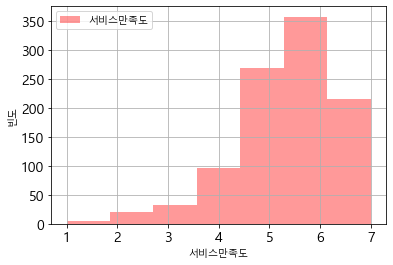

In [18]:
# 히스토그램

# 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False # - 기호가 깨지는 것을 방지

# 히스토그램 작성
plt.hist(df['서비스_만족도'], alpha=0.4, bins=7, rwidth=1, color='red', label='서비스만족도')

# 옵션 설정
plt.legend()
plt.grid()
plt.xlabel('서비스만족도')
plt.ylabel('빈도')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:title={'center':'방문 빈도와 총 매출액간 관계'}, xlabel='방문빈도', ylabel='총_매출액'>

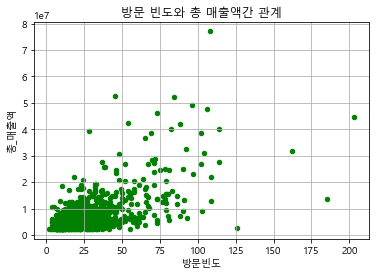

In [20]:
# 산점도 작성
df.plot.scatter(x='방문빈도',y='총_매출액',grid=True,color='green',title='방문 빈도와 총 매출액간 관계')

In [23]:
# 구매유형별 고객 그룹화하기
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

고객ID                                                               \
      count        mean         std   min     25%    50%     75%     max   
구매유형                                                                       
1      43.0  523.186047  286.875886   7.0  290.50  493.0  769.50   969.0   
2     317.0  476.406940  282.585411   5.0  223.00  487.0  694.00   997.0   
3     144.0  514.868056  287.815069  19.0  290.25  490.0  773.50   999.0   
4     496.0  509.760081  293.080306   1.0  244.75  512.5  771.25  1000.0   

       이탈여부            ...  전문성      New_1회_평균매출액                 \
      count      mean  ...  75%  max        count           mean   
구매유형                   ...                                         
1      43.0  0.046512  ...  6.0  7.0         43.0  350206.352942   
2     317.0  0.041009  ...  6.0  7.0        317.0  204790.240382   
3     144.0  0.131944  ...  6.0  7.0        144.0  736705.549853   
4     496.0  0.066532  ...  6.0  7.0        496.0  264714.005870   

                                                                  \
                std            min            25%            50%   
구매유형                                                               
1      87347.254322  178490.000000  273910.476190  364625.000000   
2     102578.219220   22461.349206  118862.307692  193453.666667   
3     311538.483097  502599.090909  553479.000000  630736.878669   
4     100920.499382   78284.193548  186106.826577  248438.571429   

                                   
                75%           max  
구매유형                               
1     414084.375000  4.897520e+05  
2     268758.923077  4.966717e+05  
3     786918.432540  2.680100e+06  
4     344615.297203  4.994987e+05  

[4 rows x 312 columns]

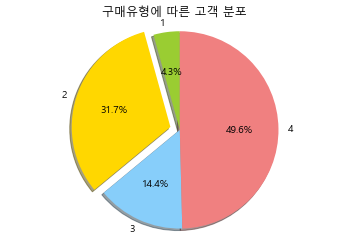

In [24]:

# 파이차트 속성 지정
labels = ['1','2','3','4']
sizes = [43, 317, 144, 496]
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = (0,0.1,0,0)

# 파이차트 작성
# explode -> 특정 그룹에 대해 시각적인 분리 수준 결정 / autopct -> 각 범주가 데이터에서 차지하는 비율을 파이차트 위에 표현 / startangle -> 시작점 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) #%1.1f%% -> 소수점 한 자리 방식의 % 표기를 한다는 의미
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show()